## Data Cleaning

In [ ]:
# load dataset
df = pd.read_csv("Novelupdates_info.csv")
df2 = pd.read_csv("Novelupdates_info2.csv")
df3 = pd.read_csv("Novelupdates_info3.csv")
df4 = pd.read_csv("Novelupdates_info4.csv")

In [16]:
df.head()

,Title,Cover,Chapters,Update Frequency,Readers,Reviews,Last Updated,Genres,Origin,Rating,Description,Source
0,Don’t Call Me Your Wife (GL),NaN,95 Chapters,Every 0.9 Day(s),152 Readers,1 Reviews,06-15-2025,"['Action', 'Adventure', 'Fantasy', 'Romance', ...",NaN,NaN,A fiery and sharp character x a gentle and cun...,https://www.novelupdates.com/series/dont-call-...
1,I Became a Rare Species in the Immortal Cultiv...,NaN,28 Chapters,Every 0.7 Day(s),76 Readers,1 Reviews,06-15-2025,"['Action', 'Adventure', 'Martial Arts', 'Roman...",NaN,NaN,The Heavenly Dao bestowed blessings from the I...,https://www.novelupdates.com/series/i-became-a...
2,I Come From the Abyss to Save Humanity Today,NaN,86 Chapters,Every 3.3 Day(s),648 Readers,4 Reviews,06-15-2025,"['Action', 'Drama', 'Fantasy', 'Gender Bender'...",NaN,NaN,"The Abyss—represents pure annihilation, they p...",https://www.novelupdates.com/series/i-come-fro...
3,How to Survive as the Horror Game Villain’s Fa...,NaN,7 Chapters,Every 4.7 Day(s),156 Readers,0 Reviews,06-15-2025,"['Fantasy', 'Romance', 'Smut']",NaN,NaN,“I’ll ask again. Who are you?”,https://www.novelupdates.com/series/how-to-sur...
4,After Becoming the Aunt of the Dragon Hero,NaN,178 Chapters,Every 0.5 Day(s),575 Readers,0 Reviews,06-15-2025,"['Action', 'Comedy', 'Fantasy', 'Martial Arts'...",NaN,NaN,Ming He always believed she had entered a worl...,https://www.novelupdates.com/series/after-beco...


In [ ]:
# combine datasets and drop duplicates
data = pd.concat([df, df2, df3, df4])
data.drop_duplicates(subset=["Title", "Source"], inplace=True)

In [ ]:
# fill missing descriptions
data["Description"].fillna("There is no description for this", inplace=True)

In [30]:
# to clean html chapters
data["Description"] = data["Description"].apply(lambda x: re.sub(r"<.*?>", "", x).strip())

In [ ]:
# converting chapters and up freq to integers
data["Chapters"] = data["Chapters"].str.extract(r'(\d+)').astype(int)
data["Update Frequency"] = data["Update Frequency"].str.extract(r'(\d+)').astype(int)
data["Readers"] = data["Readers"].str.extract(r'(\d+)').astype(int)
data["Reviews"] = data["Reviews"].str.extract(r'(\d+)').astype(int)

In [67]:
# to convert the str into a list
def parse(x):
    # use literal_eval if it's list or covert into list [genre.strip() for genre in x.split(",")]
    pass

data["Genres"] = data["Genres"].apply(ast.literal_eval)

In [77]:
# change last updated from str to datetime
data["Last Updated"] = pd.to_datetime(data["Last Updated"], errors="coerce")

In [ ]:
# data.drop(["Rating", "Origin", "Cover"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 130225
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Title             2500 non-null   object        
 1   Chapters          2500 non-null   int64         
 2   Update Frequency  2500 non-null   int64         
 3   Readers           2500 non-null   int64         
 4   Reviews           2500 non-null   int64         
 5   Last Updated      2500 non-null   datetime64[ns]
 6   Genres            2500 non-null   object        
 7   Description       2500 non-null   object        
 8   Source            2500 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 259.9+ KB


In [85]:
data.to_csv("cleaned.csv", index=False)

## EDA and Visualization

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
# counting frequency of each genre

all_genres = [x for sublist in data["Genres"] for x in sublist]
all_genres_count = Counter(all_genres)
sorted_genres = sorted(all_genres_count.items(), key=lambda x:x[1], reverse=True)

genre_df = pd.DataFrame(all_genres_count.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

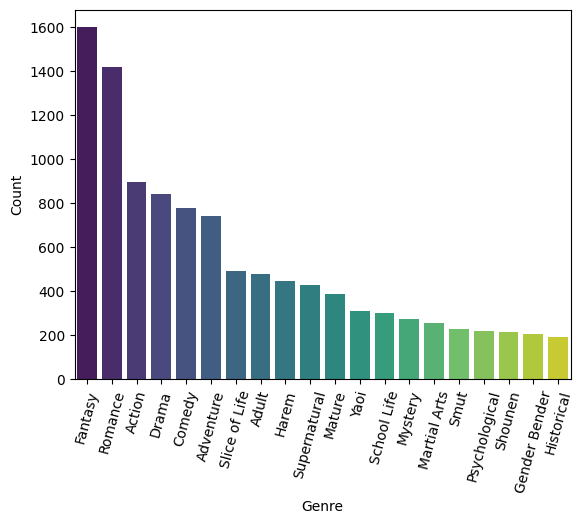

In [126]:
# plotting genres
sns.barplot(x='Genre', y='Count', data=genre_df.head(20), hue='Genre', palette='viridis')
plt.xticks(rotation=75)
plt.show()